In [11]:
# Manipulación y tratamiento de Datos
import numpy as np
import pandas as pd

# Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Modelación Arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller

# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

# No presentar advertencias
import warnings
warnings.filterwarnings("ignore")

In [12]:
!pip install tensorflow

In [13]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [14]:
import tensorflow as tf

In [15]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [16]:
df = pd.read_csv('temperaturesbarcelonadesde1780.csv')
df.head()

,Any,Temp_Mitjana_Gener,Temp_Mitjana_Febrer,Temp_Mitjana_Marc,Temp_Mitjana_Abril,Temp_Mitjana_Maig,Temp_Mitjana_Juny,Temp_Mitjana_Juliol,Temp_Mitjana_Agost,Temp_Mitjana_Setembre,Temp_Mitjana_Octubre,Temp_Mitjana_Novembre,Temp_Mitjana_Desembre
0,1786,7.8,8.3,9.9,12.8,16.8,20.2,20.9,21.1,19.5,15.5,9.2,8.3
1,1787,5.4,7.8,11.3,12.1,14.7,19.2,21.0,21.8,19.4,15.5,9.3,10.8
2,1788,6.4,10.1,10.4,12.5,17.1,19.2,22.1,23.0,19.1,15.5,10.5,5.4
3,1789,6.9,9.3,8.7,13.3,17.7,18.5,20.9,21.9,20.0,14.7,7.8,7.3
4,1790,7.4,9.5,10.4,12.3,15.0,19.0,20.8,23.1,19.3,17.1,11.7,7.9


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Any                    237 non-null    int64  
 1   Temp_Mitjana_Gener     237 non-null    float64
 2   Temp_Mitjana_Febrer    237 non-null    float64
 3   Temp_Mitjana_Marc      237 non-null    float64
 4   Temp_Mitjana_Abril     237 non-null    float64
 5   Temp_Mitjana_Maig      237 non-null    float64
 6   Temp_Mitjana_Juny      237 non-null    float64
 7   Temp_Mitjana_Juliol    237 non-null    float64
 8   Temp_Mitjana_Agost     237 non-null    float64
 9   Temp_Mitjana_Setembre  237 non-null    float64
 10  Temp_Mitjana_Octubre   237 non-null    float64
 11  Temp_Mitjana_Novembre  237 non-null    float64
 12  Temp_Mitjana_Desembre  237 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 24.2 KB


In [18]:
#rename columns
df.rename(columns={'Temp_Mitjana_Gener': "1",
                   'Temp_Mitjana_Febrer': "2",
                   'Temp_Mitjana_Marc': "3",
                   'Temp_Mitjana_Abril': "4",
                   'Temp_Mitjana_Maig': "5",
                   'Temp_Mitjana_Juny': "6",
                   'Temp_Mitjana_Juliol': "7",
                   'Temp_Mitjana_Agost': "8",
                   'Temp_Mitjana_Setembre': "9",
                   'Temp_Mitjana_Octubre': "10",
                   'Temp_Mitjana_Novembre': "11",
                   'Temp_Mitjana_Desembre': "12"},inplace=True)

In [19]:
df.columns

Index(['Any', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

<AxesSubplot:xlabel='Any'>

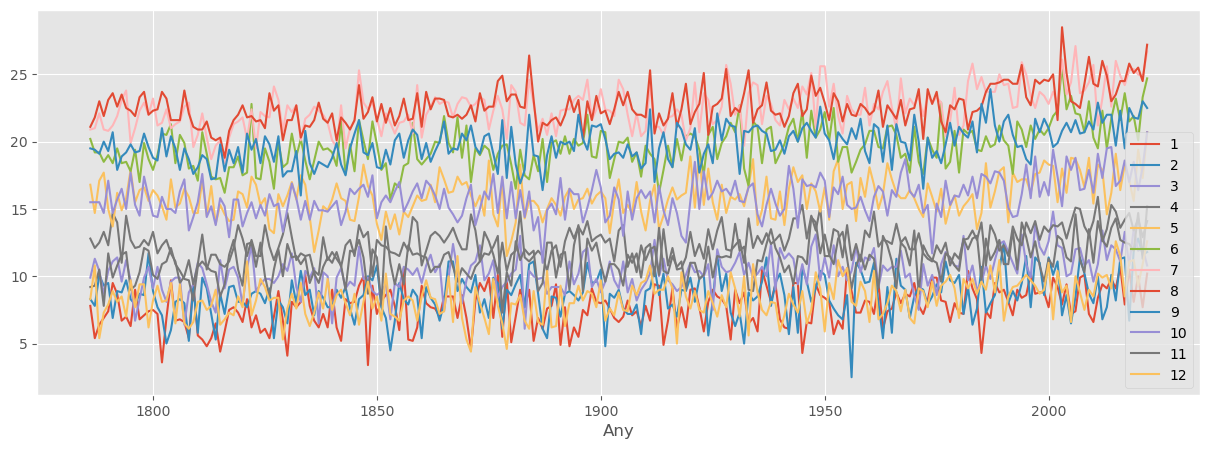

In [20]:
df.plot(x= 'Any',figsize=(15, 5))

In [21]:
# Creates a pivot table dataframe
table = df.melt(id_vars=['Any'], value_vars=['1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12'])

In [22]:
table["Data"] = pd.to_datetime(dict(year=table["Any"], month=table["variable"], day="1"))

In [23]:
table.head()

,Any,variable,value,Data
0,1786,1,7.8,1786-01-01
1,1787,1,5.4,1787-01-01
2,1788,1,6.4,1788-01-01
3,1789,1,6.9,1789-01-01
4,1790,1,7.4,1790-01-01


In [24]:
df = table.set_index("Data")
df

,Any,variable,value
Data,,,
1786-01-01,1786,1,7.8
1787-01-01,1787,1,5.4
1788-01-01,1788,1,6.4
1789-01-01,1789,1,6.9
1790-01-01,1790,1,7.4
...,...,...,...
2018-12-01,2018,12,11.1
2019-12-01,2019,12,11.2
2020-12-01,2020,12,9.3


In [25]:
df = df.drop(['Any', 'variable'], axis=1)

In [26]:
df = df.groupby(['Data']).mean()

In [27]:
fig = px.line(df, x= df.index, y="value", template = "plotly_dark", title="Temperaturas en Barcelona desde 1780")
fig.show()

In [28]:
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [29]:
Prueba_Dickey_Fuller(df["value"],"value")

Resultados de la prueba de Dickey-Fuller para columna: value
Test Statistic                          -3.180457
p-value                                  0.021144
No Lags Used                            25.000000
Número de observaciones utilizadas    2818.000000
Critical Value (1%)                     -3.432673
Critical Value (5%)                     -2.862566
Critical Value (10%)                    -2.567316
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


count    2844.000000
mean       14.593530
std         5.529662
min         2.500000
25%         9.700000
50%        14.000000
75%        19.700000
max        28.500000
Name: value, dtype: float64

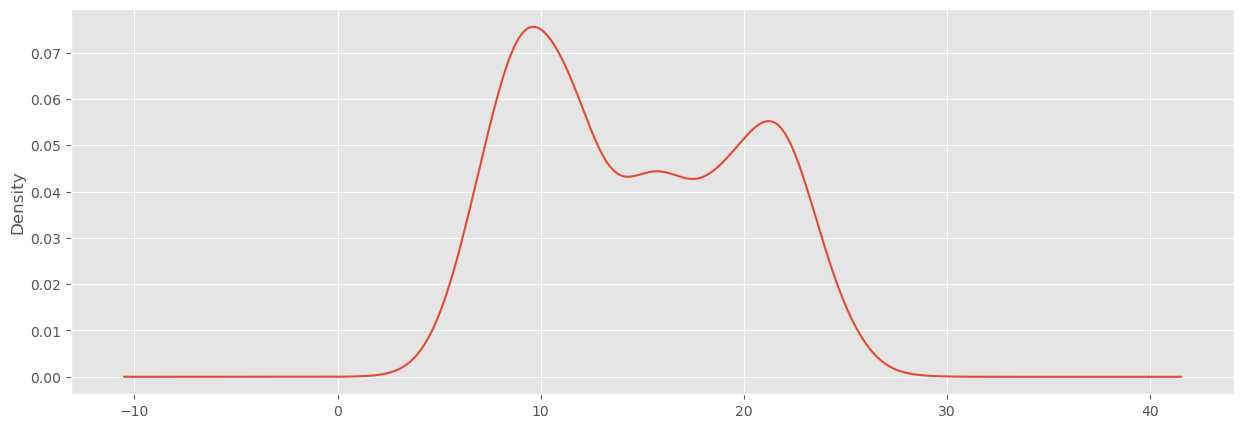

In [30]:
df["value"].plot(kind='kde', figsize =(15,5))
df["value"].describe()

In [31]:
df1=df.copy()

In [32]:

df1['value_diff'] = df['value'].diff().fillna(0)
df1['value_diff2'] = df1['value_diff'].diff().fillna(0)


In [33]:

# Take a look at the head of the dataset
df1.head()

,value,value_diff,value_diff2
Data,,,
1786-01-01,7.8,0.0,0.0
1786-02-01,8.3,0.5,0.5
1786-03-01,9.9,1.6,1.1
1786-04-01,12.8,2.9,1.3
1786-05-01,16.8,4.0,1.1


In [34]:
# df1 = df1.drop(['Any', 'variable'], axis=1)

In [35]:
Prueba_Dickey_Fuller(df1["value_diff"],"value_diff")

Resultados de la prueba de Dickey-Fuller para columna: value_diff
Test Statistic                         -22.468216
p-value                                  0.000000
No Lags Used                            23.000000
Número de observaciones utilizadas    2820.000000
Critical Value (1%)                     -3.432671
Critical Value (5%)                     -2.862565
Critical Value (10%)                    -2.567316
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


Seasonal ARIMA, es una extensión de ARIMA que admite explícitamente datos de series temporales univariadas con un componente estacional. Agrega tres nuevos hiperparámetros para especificar la autorregresión (AR), diferenciación (I) y media móvil (MA) para el componente estacional de la serie, así como un parámetro adicional para el período de la estacionalidad.

Hay cuatro elementos estacionales que no forman parte de ARIMA que deben configurarse; ellos son:

P: orden autorregresivo estacional.
D: Orden de diferencia estacional.
P: Orden promedio móvil estacional.
m: El número de pasos de tiempo para un solo período estacional.

In [36]:
fig = px.line(df1, x= df1.index, y="value_diff", template = "plotly_dark", title="Temperaturas en Barcelona desde 1780")
fig.show()

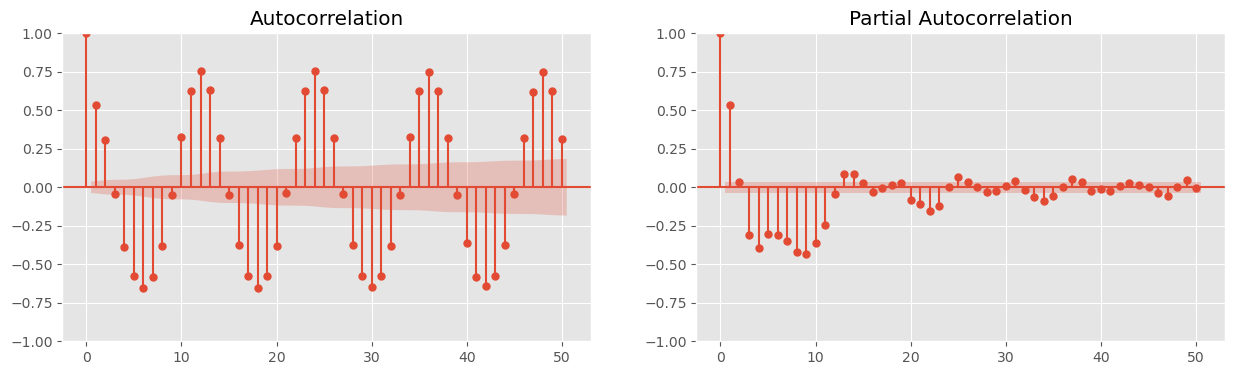

In [37]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
a = plot_acf( df1["value_diff"],lags=50, ax=axes[0])
b = plot_pacf(df1["value_diff"],lags=50, ax=axes[1])
plt.show(a)
plt.show(b)

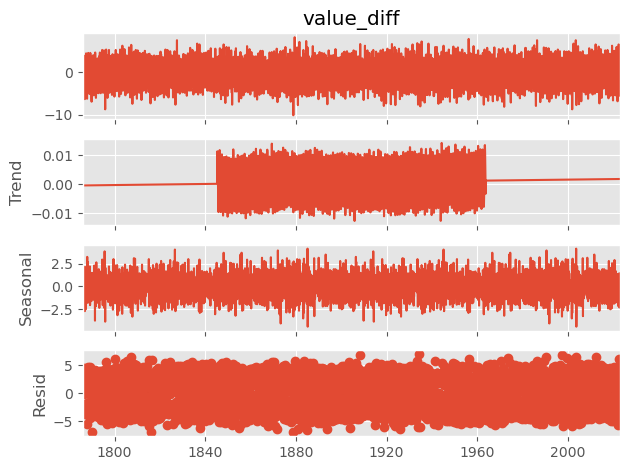

In [38]:
result = seasonal_decompose(df1['value_diff'], model='add',extrapolate_trend='freq', period = int(len(df1)/2))
result.plot()
plt.show()

In [39]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
test=test_data.copy()
train_data.shape, test_data.shape

((2832, 1), (12, 1))

In [40]:
print(f"Fechas datos_train : {train_data.index.min()} --- {train_data.index.max()}  (n={len(train_data)})")

print(f"Fechas datos_test  : {test_data.index.min()} --- {test_data.index.max()}  (n={len(test_data)})")


Fechas datos_train : 1786-01-01 00:00:00 --- 2021-12-01 00:00:00  (n=2832)
Fechas datos_test  : 2022-01-01 00:00:00 --- 2022-12-01 00:00:00  (n=12)


In [41]:
test_data.head(3)

,value
Data,
2022-01-01,10.2
2022-02-01,11.8
2022-03-01,10.8


3.1 AUTOARIMA

In [42]:
from pmdarima import auto_arima  

In [43]:
modelo_auto=auto_arima(train_data,start_p=0,d=1,start_q=0,
          max_p=4,max_d=2,max_q=4, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=1,
          max_Q=2, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)
print(modelo_auto)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=12627.535, Time=0.31 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11285.044, Time=0.63 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.16 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=12124.025, Time=0.32 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=10968.007, Time=1.49 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.73 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=11484.919, Time=1.05 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=10724.424, Time=2.86 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=11055.551, Time=2.03 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=14.29 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.53 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=10610.684, Time=4.38 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=10932.769, Time=2.20 sec
 ARIMA(3,1,0)(2,1,1)[12]          

In [44]:
print(modelo_auto.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 2832
Model:             SARIMAX(4, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -5239.282
Date:                            Wed, 14 Jun 2023   AIC                          10492.563
Time:                                    12:19:49   BIC                          10534.172
Sample:                                01-01-1786   HQIC                         10507.577
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6277      0.018    -35.106      0.000      -0.663      -0.593
ar.L2         -0.4755      0.021   

In [45]:
arima_model = SARIMAX(train_data["value"], order = (4,1,0), seasonal_order = (2,1,0,12)) 
arima_result = arima_model.fit() 
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                 2832
Model:             SARIMAX(4, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -5239.282
Date:                            Wed, 14 Jun 2023   AIC                          10492.563
Time:                                    12:19:51   BIC                          10534.172
Sample:                                01-01-1786   HQIC                         10507.577
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6277      0.018    -35.106      0.000      -0.663      -0.593
ar.L2         -0.4755      0.021    -22.668      0.000      -0.517      -0.434
ar.L3         -0.3205      0.021    -15.239      0.000      -0.362      -0.279
ar.L4         -0.2043      0.018    -11.215      0.000      -0.240      -0.169
ar.S.L12      -0.6779      0.017    -40.091      0.000      -0.711      -0.645
ar.S.L24      -0.3335      0.017    -19.160      0.000      -0.368      -0.299
sigma2         2.4030      0.059     40.781      0.000       2.288       2.518
===================================================================================
Ljung-Box (L1) (Q):                   2.77   Jarque-Bera (JB):                19.00
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -0.07
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

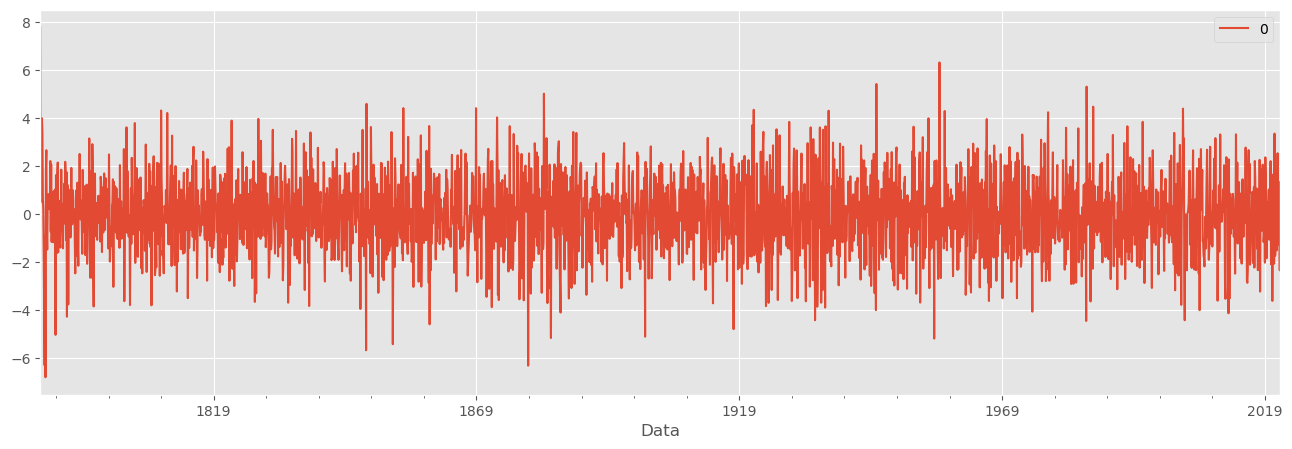

In [46]:
# Gráfico de línea de errores residuales
residuals = pd.DataFrame(arima_result.resid)
residuals.plot(figsize = (16,5));
plt.show();

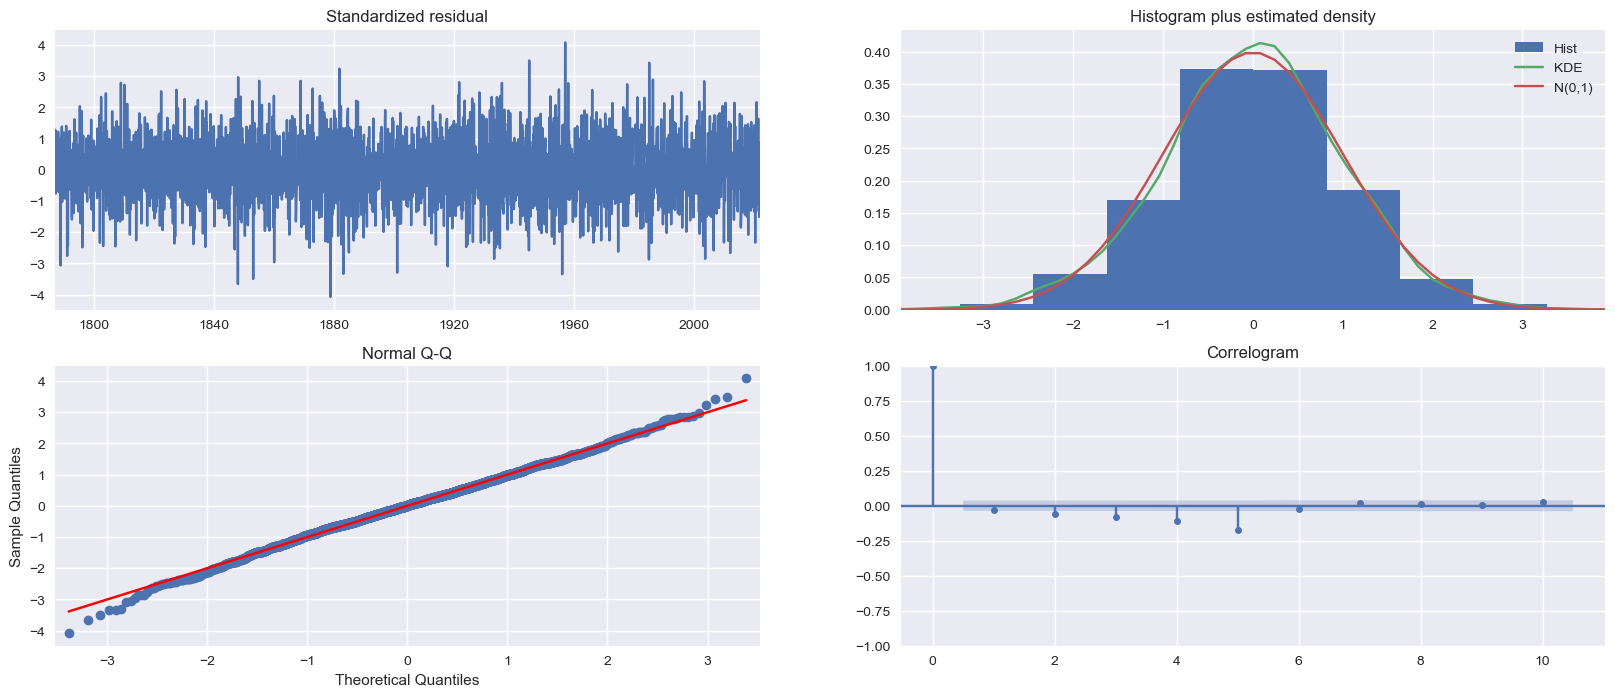

In [47]:
plt.style.use('seaborn')
modelo_auto.plot_diagnostics(figsize=(20,8))
plt.show()

In [48]:
len(train_data)

2832

In [49]:
len(df)-1

2843

In [50]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2022-01-01     8.540187
2022-02-01    12.169738
2022-03-01    12.524241
2022-04-01    13.253312
2022-05-01    17.419700
2022-06-01    21.665486
2022-07-01    25.007748
2022-08-01    24.977080
2022-09-01    22.042841
2022-10-01    17.572318
2022-11-01    12.595473
2022-12-01    10.371998
Freq: MS, Name: ARIMA Predictions, dtype: float64

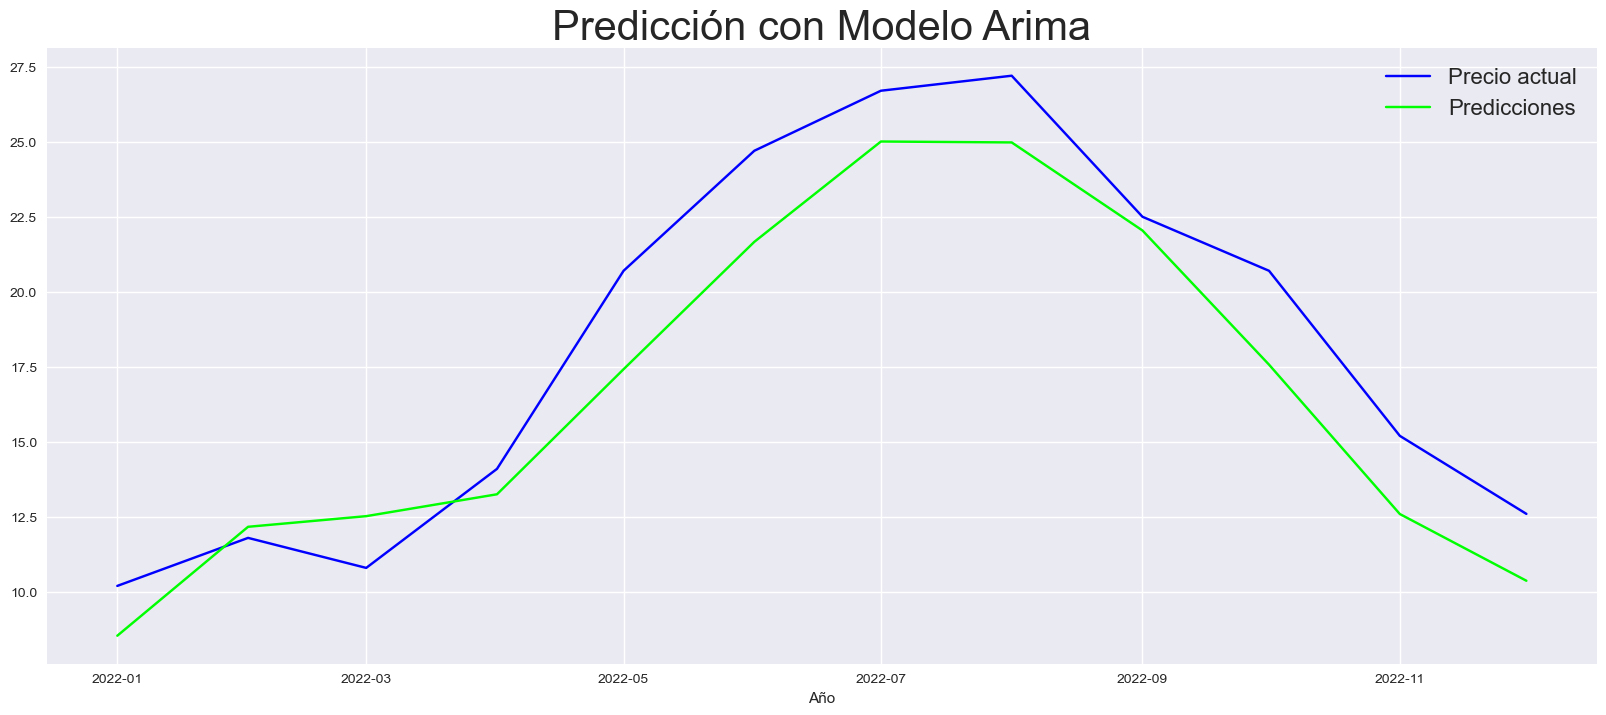

In [51]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20, 8)

plt.plot(test_data["value"],color="blue" ,label="Precio actual")
plt.plot(arima_pred, color="lime", label="Predicciones")
plt.title("Predicción con Modelo Arima", fontsize=30);
plt.xlabel('Año')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();

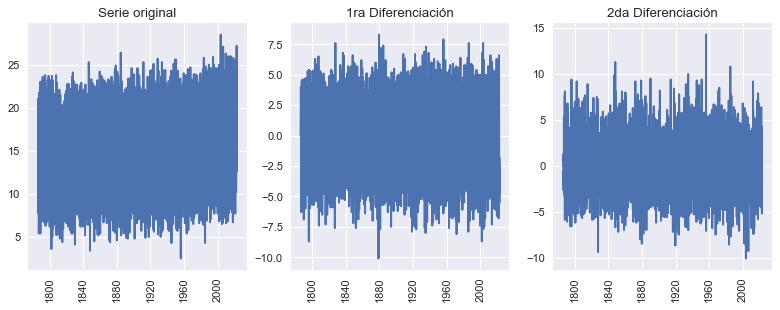

In [52]:
#ploting the original and diferenced series.

plt.rcParams.update({'figure.figsize':(12,4), 'figure.dpi':80})

# Original Series
fig, axes = plt.subplots(1, 3, sharex=True)
axes[0].plot(df['value']) 
axes[0].set_title('Serie original')

# 1st Diff
axes[1].plot(df1['value_diff'])
axes[1].set_title('1ra Diferenciación')

# 2th Diff
axes[2].plot(df1['value_diff2'])
axes[2].set_title('2da Diferenciación')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
plt.show()

In [53]:
arima_pred2 = arima_result.predict(start='2015-01-01',end='2025-01-01', typ="levels").rename("ARIMA Predictions")
arima_pred2

2015-01-01     8.888517
2015-02-01     8.093180
2015-03-01    12.370532
2015-04-01    13.635411
2015-05-01    16.321257
                ...    
2024-09-01    22.326211
2024-10-01    17.575702
2024-11-01    12.140576
2024-12-01    10.386256
2025-01-01     8.398085
Freq: MS, Name: ARIMA Predictions, Length: 121, dtype: float64

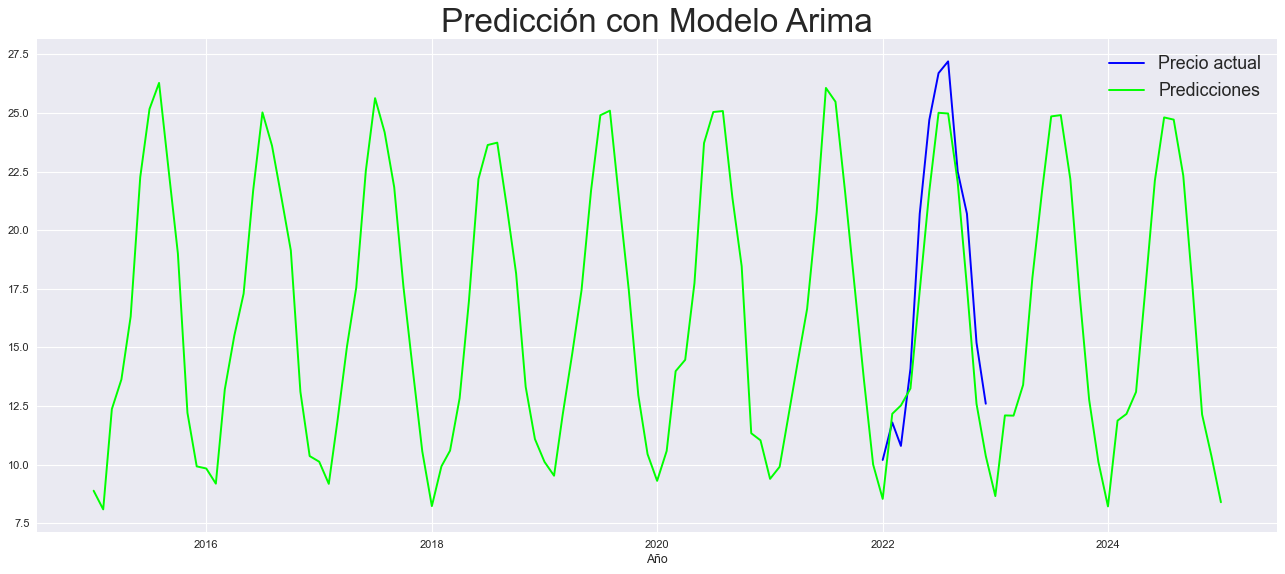

In [54]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20, 8)

plt.plot(test_data["value"],color="blue" ,label="Precio actual")
plt.plot(arima_pred2, color="lime", label="Predicciones")
plt.title("Predicción con Modelo Arima", fontsize=30);
plt.xlabel('Año')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();

In [55]:
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [56]:
evaluacion_metrica(test_data["value"],arima_pred)

Evaluation metric results:-
MSE is : 4.674520968302376
MAE is : 1.9373196918637705
RMSE is : 2.16206405277512
MAPE is : 11.331498590452409
R2 is : 0.8734506799178168



In [57]:
test_data['ARIMA_Predictions']= arima_pred
test_data

,value,ARIMA_Predictions
Data,,
2022-01-01,10.2,8.540187
2022-02-01,11.8,12.169738
2022-03-01,10.8,12.524241
2022-04-01,14.1,13.253312
2022-05-01,20.7,17.419700
2022-06-01,24.7,21.665486
2022-07-01,26.7,25.007748
2022-08-01,27.2,24.977080
2022-09-01,22.5,22.042841


3.2 LSTM Forecast
LSTM significa memoria a corto plazo. Es un modelo o arquitectura que amplía la memoria de las redes neuronales recurrentes. Por lo general, las redes neuronales recurrentes tienen "memoria a corto plazo" en el sentido de que utilizan información anterior persistente para ser utilizada en la red neuronal actual. Esencialmente, la información anterior se utiliza en la presente tarea. Eso significa que no tenemos una lista de toda la información anterior disponible para el nodo neuronal. LSTM introduce la memoria a largo plazo en las redes neuronales recurrentes. Mitiga el problema del gradiente de fuga, que es donde la red neuronal deja de aprender porque las actualizaciones de los diversos pesos dentro de una red neuronal dada se vuelven cada vez más pequeñas. Lo hace mediante el uso de una serie de "puertas". Estos están contenidos en bloques de memoria que están conectados a través de capas, así:

In [58]:
#Estandarización
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [59]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)

scaled_test_data = scaler.transform(test)

In [60]:
n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

.2 Modelación
4.2.1 Parámetros clave para LSTM con Keras
Veamos los parámetros clave para ajustar el modelo LSTM.

hidden_layer_sizes: Debe proporcionar una cantidad de capas ocultas y neuronas para cada capa oculta. Por ejemplo, hidden_layer_sizes – (5,3,3) significa que hay tres capas ocultas y el número de neuronas para la capa uno es 5, para la capa dos es 3 y para la capa tres es 3, respectivamente. El valor predeterminado es (100), es decir, una capa oculta con 100 neuronas.
activation: Esta es la función de activación de una capa oculta; hay cuatro funciones de activación disponibles para su uso; el valor predeterminado es "relu".
relu: La función de unidad lineal rectificada, devuelve 
logística: La función sigmoidea logística, devuelve f(x) = 1 / (1 + exp(-x)).
identidad: activación sin operación, útil para implementar un cuello de botella lineal, devuelve f(x) = x
tanh: La función tan hiperbólica, devuelve 
.
solver: Esto es para optimizar el peso. Hay tres opciones disponibles, la predeterminada es "adam".
adam: Optimizador basado en gradiente estocástico propuesto por Diederik Kingma y Jimmy Ba, que funciona bien para un gran conjunto de datos
lbfgs: Pertenece a la familia de métodos cuasi-Newton, funciona bien para conjuntos de datos pequeños
sgd: Descenso de gradiente estocástico
max_iter: Este es el número máximo de iteraciones para que el solucionador converja, el valor predeterminado es 200.
learning_rate_init: Esta es la tasa de aprendizaje inicial para controlar el tamaño de paso para actualizar los pesos (solo se aplica a los solucionadores sgd/ adam), el valor predeterminado es 0,001.

In [61]:

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [62]:
lstm_model.fit_generator(generator,epochs=50)

Epoch 1/50
2820/2820 [==============================] - 14s 4ms/step - loss: 0.0088
Epoch 2/50
2820/2820 [==============================] - 11s 4ms/step - loss: 0.0043
Epoch 3/50
2820/2820 [==============================] - 11s 4ms/step - loss: 0.0038
Epoch 4/50
2820/2820 [==============================] - 11s 4ms/step - loss: 0.0036
Epoch 5/50
2820/2820 [==============================] - 11s 4ms/step - loss: 0.0034
Epoch 6/50
2820/2820 [==============================] - 12s 4ms/step - loss: 0.0033
Epoch 7/50
2820/2820 [==============================] - 11s 4ms/step - loss: 0.0032
Epoch 8/50
2820/2820 [==============================] - 11s 4ms/step - loss: 0.0032
Epoch 9/50
2820/2820 [==============================] - 11s 4ms/step - loss: 0.0031
Epoch 10/50
2820/2820 [==============================] - 11s 4ms/step - loss: 0.0031
Epoch 11/50
2820/2820 [==============================] - 11s 4ms/step - loss: 0.0031
Epoch 12/50
2820/2820 [==============================] - 11s 4ms/step - lo

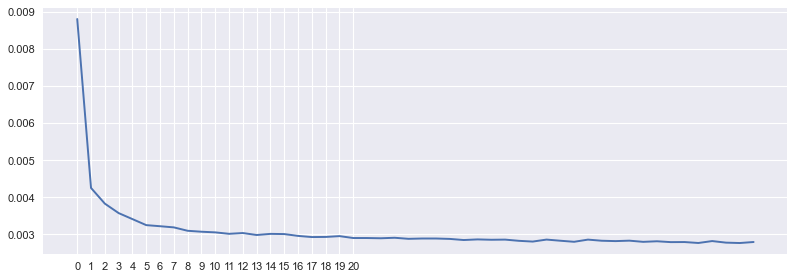

In [63]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [64]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


In [65]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [66]:
lstm_predictions

array([[ 8.5865868 ],
       [ 9.63214815],
       [10.99457198],
       [12.81649113],
       [16.18105268],
       [20.44313037],
       [23.29943466],
       [23.37418544],
       [20.88458073],
       [16.48173106],
       [11.25916743],
       [ 8.21736002]])

In [67]:
test_data['LSTM_Predictions'] = lstm_predictions

In [68]:
test_data

,value,ARIMA_Predictions,LSTM_Predictions
Data,,,
2022-01-01,10.2,8.540187,8.586587
2022-02-01,11.8,12.169738,9.632148
2022-03-01,10.8,12.524241,10.994572
2022-04-01,14.1,13.253312,12.816491
2022-05-01,20.7,17.419700,16.181053
2022-06-01,24.7,21.665486,20.443130
2022-07-01,26.7,25.007748,23.299435
2022-08-01,27.2,24.977080,23.374185
2022-09-01,22.5,22.042841,20.884581


In [69]:
ai=test_data[["value","LSTM_Predictions"]]
fig = px.line(ai, x=test_data.index, y=ai.columns,title="Predicción con Modelo LSTM", template = "plotly_dark")
fig.show()

In [70]:
evaluacion_metrica(test_data["value"],test_data["LSTM_Predictions"])

Evaluation metric results:-
MSE is : 10.739294115661922
MAE is : 2.951558625201384
RMSE is : 3.2770862234097415
MAPE is : 16.602306786266542
R2 is : 0.70926424809831



3.3 RANDOM FOREST

In [159]:
df.head()

,value
Data,
1786-01-01,7.8
1786-02-01,8.3
1786-03-01,9.9
1786-04-01,12.8
1786-05-01,16.8


In [160]:
df_rf=df.reset_index()
df_rf.head()

,Data,value
0,1786-01-01,7.8
1,1786-02-01,8.3
2,1786-03-01,9.9
3,1786-04-01,12.8
4,1786-05-01,16.8


In [161]:
#Percentage Change
#Recordemos que la unidad original estaba en millones de dólares, que son las ventas de muebles y artículos para el hogar. Un tipo de diferenciación es el cambio porcentual, que normalmente se aplica a unidades monetarias en montos de precios o ventas en dólares.

#Entre cada punto de datos, podemos calcular el cambio porcentual. Tendremos que eliminar el primer punto de datos, ya que se convertirá en un Nan.
df_rf['value_pct']= df_rf['value'].pct_change()
df_rf.dropna(inplace=True)
df_rf.head()

,Data,value,value_pct
1,1786-02-01,8.3,0.064103
2,1786-03-01,9.9,0.192771
3,1786-04-01,12.8,0.292929
4,1786-05-01,16.8,0.312500
5,1786-06-01,20.2,0.202381


In [162]:
df_rf['value_pct'].describe()

count    2843.000000
mean        0.033425
std         0.267802
min        -0.719101
25%        -0.168052
50%         0.022727
75%         0.206864
max         3.160000
Name: value_pct, dtype: float64

In [163]:
fig = px.line(df_rf, x="Data", y="value_pct",template = "plotly_dark",
              title="Porcentaje de Cambio")
fig.show()

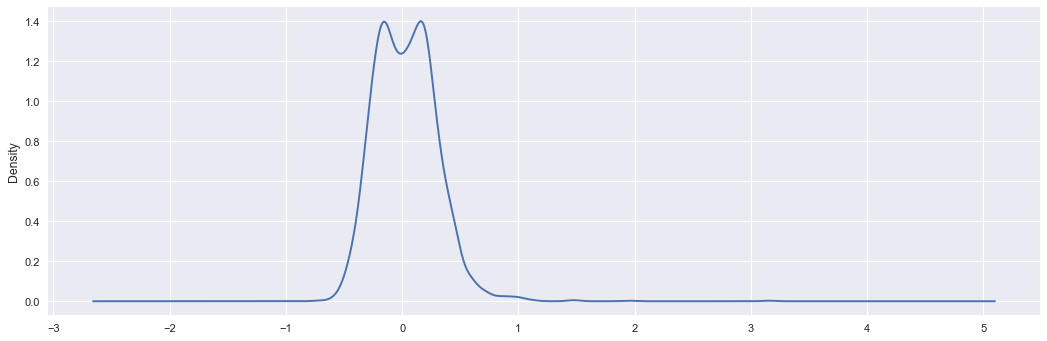

In [164]:
df_rf['value_pct'].plot(kind='kde',figsize = (16,5));

In [165]:
# Variables de estacionalidad
df_rf['Mes'] = pd.to_datetime(df_rf['Data'])
df_rf['Any'] = df_rf['Data'].apply(lambda x: x.year)
df_rf['Mes'] = df_rf['Data'].apply(lambda x: x.month)
df_rf.head()

,Data,value,value_pct,Mes,Any
1,1786-02-01,8.3,0.064103,2,1786
2,1786-03-01,9.9,0.192771,3,1786
3,1786-04-01,12.8,0.292929,4,1786
4,1786-05-01,16.8,0.312500,5,1786
5,1786-06-01,20.2,0.202381,6,1786


In [166]:
# Agregar un año de datos retrasados
df_rf['L1'] = df_rf["value_pct"].shift(1)
df_rf['L2'] = df_rf["value_pct"].shift(2)
df_rf['L3'] = df_rf["value_pct"].shift(3)
df_rf['L4'] = df_rf["value_pct"].shift(4)
df_rf['L5'] = df_rf["value_pct"].shift(5)
df_rf['L6'] = df_rf["value_pct"].shift(6)
df_rf['L7'] = df_rf["value_pct"].shift(7)
df_rf['L8'] = df_rf["value_pct"].shift(8)
df_rf['L9'] = df_rf["value_pct"].shift(9)
df_rf['L10'] = df_rf["value_pct"].shift(10)
df_rf['L11'] = df_rf["value_pct"].shift(11)
df_rf['L12'] = df_rf["value_pct"].shift(12)

In [167]:
df_rf.head()

,Data,value,value_pct,Mes,Any,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12
1,1786-02-01,8.3,0.064103,2,1786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1786-03-01,9.9,0.192771,3,1786,0.064103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1786-04-01,12.8,0.292929,4,1786,0.192771,0.064103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1786-05-01,16.8,0.312500,5,1786,0.292929,0.192771,0.064103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1786-06-01,20.2,0.202381,6,1786,0.312500,0.292929,0.192771,0.064103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
df_rf = df_rf.dropna()
df_rf.head()

,Data,value,value_pct,Mes,Any,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12
13,1787-02-01,7.8,0.444444,2,1787,-0.349398,-0.097826,-0.406452,-0.205128,-0.075829,0.009569,0.034653,0.202381,0.312500,0.292929,0.192771,0.064103
14,1787-03-01,11.3,0.448718,3,1787,0.444444,-0.349398,-0.097826,-0.406452,-0.205128,-0.075829,0.009569,0.034653,0.202381,0.312500,0.292929,0.192771
15,1787-04-01,12.1,0.070796,4,1787,0.448718,0.444444,-0.349398,-0.097826,-0.406452,-0.205128,-0.075829,0.009569,0.034653,0.202381,0.312500,0.292929
16,1787-05-01,14.7,0.214876,5,1787,0.070796,0.448718,0.444444,-0.349398,-0.097826,-0.406452,-0.205128,-0.075829,0.009569,0.034653,0.202381,0.312500
17,1787-06-01,19.2,0.306122,6,1787,0.214876,0.070796,0.448718,0.444444,-0.349398,-0.097826,-0.406452,-0.205128,-0.075829,0.009569,0.034653,0.202381


In [169]:
df_rf= df_rf.set_index("Data")
df_rf.head()

,value,value_pct,Mes,Any,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12
Data,,,,,,,,,,,,,,,,
1787-02-01,7.8,0.444444,2,1787,-0.349398,-0.097826,-0.406452,-0.205128,-0.075829,0.009569,0.034653,0.202381,0.312500,0.292929,0.192771,0.064103
1787-03-01,11.3,0.448718,3,1787,0.444444,-0.349398,-0.097826,-0.406452,-0.205128,-0.075829,0.009569,0.034653,0.202381,0.312500,0.292929,0.192771
1787-04-01,12.1,0.070796,4,1787,0.448718,0.444444,-0.349398,-0.097826,-0.406452,-0.205128,-0.075829,0.009569,0.034653,0.202381,0.312500,0.292929
1787-05-01,14.7,0.214876,5,1787,0.070796,0.448718,0.444444,-0.349398,-0.097826,-0.406452,-0.205128,-0.075829,0.009569,0.034653,0.202381,0.312500
1787-06-01,19.2,0.306122,6,1787,0.214876,0.070796,0.448718,0.444444,-0.349398,-0.097826,-0.406452,-0.205128,-0.075829,0.009569,0.034653,0.202381


In [170]:
# dividir en variables rezagadas (características) y datos de series de tiempo originales (objetivo)
X2= df_rf.iloc[:,2:] # dividir todas las filas y comenzar con la columna 0 y subir hasta la última columna, pero sin incluirla
y2 = df_rf.iloc[:,1] # dividir todas las filas y la última columna, esencialmente separando la columna 't'

In [171]:
X2.head(3)

,Mes,Any,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12
Data,,,,,,,,,,,,,,
1787-02-01,2,1787,-0.349398,-0.097826,-0.406452,-0.205128,-0.075829,0.009569,0.034653,0.202381,0.312500,0.292929,0.192771,0.064103
1787-03-01,3,1787,0.444444,-0.349398,-0.097826,-0.406452,-0.205128,-0.075829,0.009569,0.034653,0.202381,0.312500,0.292929,0.192771
1787-04-01,4,1787,0.448718,0.444444,-0.349398,-0.097826,-0.406452,-0.205128,-0.075829,0.009569,0.034653,0.202381,0.312500,0.292929


In [172]:
y2.head()

Data
1787-02-01    0.444444
1787-03-01    0.448718
1787-04-01    0.070796
1787-05-01    0.214876
1787-06-01    0.306122
Name: value_pct, dtype: float64

In [ ]:
# Target Train-Test split
from pandas import read_csv

Y2 = y2
traintarget_size = int(len(Y2) * 0.80)   # Set split
train_target, test_target = Y2[0:traintarget_size], Y2[traintarget_size:len(Y2)]

print('Observaciones para el objetivo: %d' % (len(Y2)))
print('Observaciones de entrenamiento para el objetivo: %d' % (len(train_target)))
print('Observaciones de prueba para el objetivo: %d' % (len(test_target)))

In [173]:
# Features Train-Test split

trainfeature_size = int(len(X2) * 0.80)
train_feature, test_feature = X2[0:trainfeature_size], X2[trainfeature_size:len(X2)]
print('Observaciones para la característica: %d' % (len(X2)))
print('Observaciones de entrenamiento para la característica: %d' % (len(train_feature)))
print('Observaciones de prueba para la característica: %d' % (len(test_feature)))

Observaciones para la característica: 2831
Observaciones de entrenamiento para la característica: 2264
Observaciones de prueba para la característica: 567


In [174]:
# Creando Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2,  shuffle=False)

In [175]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Creamos el modelo con 500 árboles
rfr = RandomForestRegressor(n_estimators=500)

# Entrenamos el modelo
rfr.fit(train_feature, train_target)

# Hacemos las predicciones 
fcst = rfr.predict(test_feature)

ValueError: Found input variables with inconsistent numbers of samples: [2264, 2274]